In [17]:
# start by loading data on the returns of the market portfolio and the risk-free rate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dat APIs

* Pandas has an eco-system of APIs that allow you to get data from the web directly into a pandas dataframe


**FRED**
* Here we will look at one API that gets macro and financial data from the Federal Reserve Bank of St louis

* Lots and lots of data!

  https://fred.stlouisfed.org/categories


* For example the yield on the three month treasury bill

  https://fred.stlouisfed.org/series/DTB3


* you will also need to apply for an API key here

  https://research.stlouisfed.org/docs/api/api_key.html

* once you have it you use it to do this:

<AxesSubplot:>

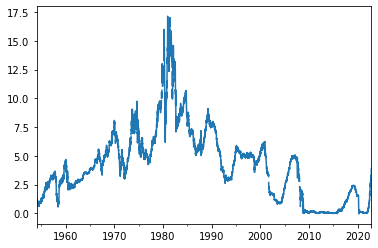

In [2]:
#!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='f9207136b3333d7cf92c07273f6f5530')
data = fred.get_series('DTB3')
data.plot()

<AxesSubplot:>

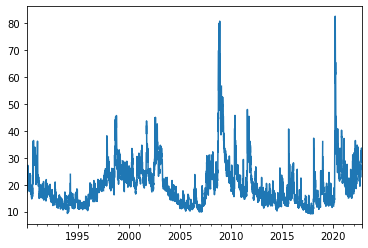

In [3]:
data = fred.get_series('VIXCLS')
data.plot()

**Google Trends**

<AxesSubplot:xlabel='date'>

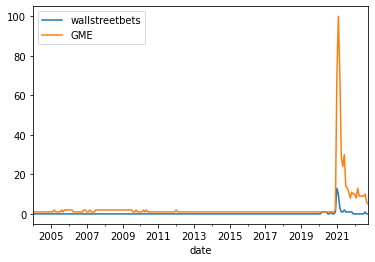

In [11]:
#!pip install pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()
pytrend.build_payload(kw_list=['wallstreetbets','GME'],timeframe='all')
Googletrends=pytrend.interest_over_time()
Googletrends.plot()

**WallStreet**

- allow you to get real time data on stocks, calls, and put options
- Also allow you to very easily get historical data
* here is the manual:https://github.com/mcdallas/wallstreet

In [13]:
#!pip install wallstreet
from wallstreet import Stock, Call, Put
s = Stock('GME')

In [14]:
# this is the latest price of GME stock
s.price

25.3

In [15]:
# this gives you historical information
df = s.historical(days_back=1000, frequency='d')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,1.050000,1.087500,1.040000,1.070000,1.070000,8490000
1,2020-01-28,1.075000,1.075000,1.045000,1.052500,1.052500,8579600
2,2020-01-29,1.055000,1.080000,1.032500,1.032500,1.032500,6210400
3,2020-01-30,1.025000,1.030000,0.970000,0.982500,0.982500,12026000
4,2020-01-31,0.977500,0.985000,0.957500,0.960000,0.960000,11566800
...,...,...,...,...,...,...,...
687,2022-10-17,25.370001,26.410000,25.240000,25.959999,25.959999,3172200
688,2022-10-18,27.100000,27.740000,26.129999,26.670000,26.670000,4402600
689,2022-10-19,26.000000,26.180000,24.270000,24.540001,24.540001,5318400
690,2022-10-20,24.650000,25.450001,24.070000,24.410000,24.410000,5148600


Text(0.5, 1.0, 'Wild!')

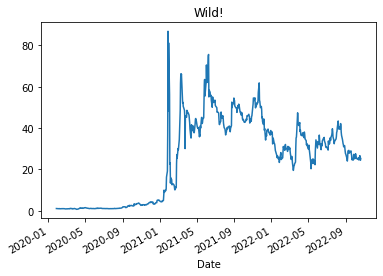

In [18]:
df.set_index('Date').Close.plot()
plt.title('Wild!')

**Pandas Datareader**

this gives you acess to several data servers

For example the one that we used in Chapter 5.4

We will be particularly interested in the one Ken French updates with several quant strategies

Please check out https://pandas-datareader.readthedocs.io/en/latest/remote_data.html all the possiblities



In [21]:
#!pip install pandas_datareader
from pandas_datareader.famafrench import get_available_datasets
len(get_available_datasets())

297

There are 297 different data sets in Ken French library!

Below I show the full list. You can simply chose one to import, below I am import the `'49_Industry_Portfolios'` which has the portfolio of US stocks split in 49 industries.

In fact if you print the `'DESCR'` field which contains the data set description you see that there are in fact 7 data sets as described below



In [1]:
from datetime import datetime
import pandas_datareader.data as web

start = datetime(1926, 1, 1) # this tell which month to start
ds = web.DataReader('49_Industry_Portfolios', 'famafrench',start=start)
print(ds['DESCR'])



49 Industry Portfolios
----------------------

This file was created by CMPT_IND_RETS using the 202103 CRSP database. It contains value- and equal-weighted returns for 49 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (1137 rows x 49 cols)
  1 : Average Equal Weighted Returns -- Monthly (1137 rows x 49 cols)
  2 : Average Value Weighted Returns -- Annual (94 rows x 49 cols)
  3 : Average Equal Weighted Returns -- Annual (94 rows x 49 cols)
  4 : Number of Firms in Portfolios (1137 rows x 49 cols)
  5 : Average Firm Size (1137 rows x 49 cols)
  6 : Sum of BE / Sum of ME (95 rows x 49 cols)
  7 : Value-Weighted Average of BE/ME (95 rows x 49 cols)


If you want Value weighted monthly returns you simply select `0`

In [36]:
ds[0].tail()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2020-11,15.18,7.32,9.22,10.88,8.05,21.89,11.40,22.89,5.80,14.27,...,10.79,17.10,15.33,7.57,11.30,18.25,11.92,21.45,16.78,15.65
2020-12,1.33,1.90,6.84,3.33,8.67,15.77,9.79,10.83,0.86,4.63,...,2.46,0.73,3.04,1.08,4.05,7.55,4.42,9.68,8.24,1.78
2021-01,2.49,-1.32,-9.60,-6.89,-2.28,6.21,-3.77,3.66,-5.78,-4.84,...,-5.13,-4.58,-1.53,0.80,-4.52,-3.40,-3.85,3.87,-1.25,-1.76
2021-02,12.40,-0.04,0.66,-3.21,5.73,-2.33,10.42,13.70,-0.12,4.07,...,0.87,8.78,5.70,-3.17,7.97,14.29,4.11,18.83,9.31,5.98
2021-03,3.35,8.07,7.15,8.45,11.71,-8.30,-3.22,5.14,7.31,0.27,...,6.00,7.84,8.73,5.36,3.15,4.90,9.18,-1.24,4.11,6.03


If you want the book to market ratio for each industry you select `6`

In [39]:
ds[6].tail()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2016,0.16,0.35,0.13,0.12,0.10,0.28,0.22,0.80,0.23,0.20,...,0.36,0.32,0.31,0.22,0.12,0.83,0.72,0.40,0.66,0.36
2017,0.12,0.37,0.12,0.13,0.09,0.25,0.17,0.71,0.22,0.21,...,0.29,0.25,0.31,0.21,0.16,0.63,0.60,0.33,0.49,0.34
2018,0.46,0.46,0.10,0.14,0.14,0.21,0.13,0.61,0.24,0.16,...,0.37,0.29,0.32,0.16,0.14,0.57,0.58,0.30,0.46,0.40
2019,0.61,0.44,0.08,0.14,0.17,0.17,0.14,0.71,0.18,0.16,...,0.36,0.28,0.33,0.16,0.11,0.58,0.55,0.42,0.53,0.34
2020,1.14,0.45,0.10,0.17,0.09,0.20,0.14,0.80,0.15,0.16,...,0.40,0.31,0.33,0.14,0.23,0.75,0.69,0.56,0.55,0.49


Below is the full list of datasets

In [29]:
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

**WRDS**

This is harder and more sophisticated

You DONT NEED TO USE THIS IF YOU DONT WANT!

WRDS has all sorts of amazing data for finance. For equity prices and mutual funds in particular.

You can easily register for an account here https://wrds-www.wharton.upenn.edu/register/

In this class we will use it go get stock market data and also data on company earnigns and other balance sheet information

Google/Yahoo finance data are nice to play with, but they tend to have errors in it. So if you are doing serious work I will probably advise agaist using them only.

WRDS is really the gold standard, but the data publication lag is long, so you can use it to do research, but not to trade

To use it you have to load two libraries

In [23]:
#!pip install wrds
import wrds
import psycopg2 



You then initiate a connection when you are requested to type your pasword and username

In [24]:
conn=wrds.Connection()

Enter your WRDS username [Alan.Moreira]: moreira5
Enter your password: ···········


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


With this connection you can use their SQL interface to get the desired data

Here I recommend most copying and pasting code across the web.

This website by Freda Drechsler provides lots of guidance and code on how to do it

https://www.fredasongdrechsler.com/intro-to-python-for-fnce/maneuvering-wrds-data

and also has lots of code that teaches you how to get both financial and accouting information from WRDS, for example, (https://www.fredasongdrechsler.com/full-python-code/dgtw)

Below we will simply write a function that dowloads dailt return data for a given firm

In [25]:
def get_returns(tickers,conn,startdate,enddate):
    ticker=tickers[0]
    df = conn.raw_sql("""
                          select a.permno, b.ticker, a.date,a.ret 
                          from crsp.dsf as a
                          left join crsp.msenames as b
                          on a.permno=b.permno
                          and b.namedt<=a.date
                          and a.date<=b.nameendt
                          where a.date between '"""+ startdate+"""'  and '"""+ enddate+            
                          """' and  b.ticker='"""+ticker+"'")
            
    df.set_index(['date','permno'],inplace=True)
    df=df['ret'].unstack()
    return df

<AxesSubplot:xlabel='date'>

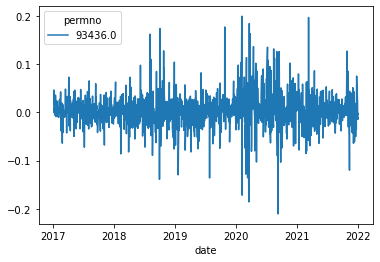

In [26]:
df=get_returns(['TSLA'],conn,'1/1/2017','1/1/2022')
df.plot()

If I wanted other information I would have to know this information is named in the database

For example, 
- vol gets tradign volume (in shares),
- prc gets the unadjusted price, 
- retx gets returns without dividends
- shrout gets share outstanding


In the end of this notebook you put a list of data that this particular data set in wrds allow you easy access to.It also has a description of how missing values are handled.




To construct the market cap you need both the price and the shareoutstanding, which you can easily download with a single function call by adding to your code



In [27]:
def get_data(tickers,conn,startdate,enddate):
    ticker=tickers[0]
    df = conn.raw_sql("""
                          select a.permno, b.ticker, a.date,a.prc,a.shrout 
                          from crsp.dsf as a
                          left join crsp.msenames as b
                          on a.permno=b.permno
                          and b.namedt<=a.date
                          and a.date<=b.nameendt
                          where a.date between '"""+ startdate+"""'  and '"""+ enddate+            
                          """' and  b.ticker='"""+ticker+"'")
            
    df.set_index(['date','permno'],inplace=True)
 #   I commented out this step because now I would like to get more than one variable so I cannot unstack
  #  df=df[variable].unstack()
    return df

In [28]:
df=get_data(['TSLA'],conn,'1/1/2005','1/1/2022')
df.tail()

,,ticker,prc,shrout
date,permno,,,
2021-12-27,93436.0,TSLA,1093.939941,1004265.0
2021-12-28,93436.0,TSLA,1088.469971,1004265.0
2021-12-29,93436.0,TSLA,1086.189941,1004265.0
2021-12-30,93436.0,TSLA,1070.339966,1004265.0
2021-12-31,93436.0,TSLA,1056.780029,1033534.0


<AxesSubplot:xlabel='date,permno'>

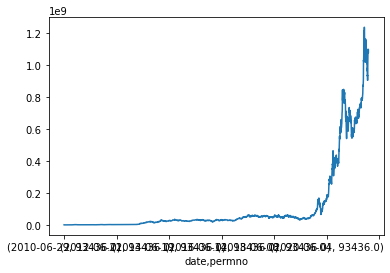

In [29]:
df['mcap']=df.prc.abs()*df.shrout
# the use a negative price to say that the price is not based on end of day transaction 
#but a mid price between bid and ask
df.mcap.plot()

This is ugly because we have the permno, the indentity of security as an index. To fix this, lets take this out of the index

<AxesSubplot:xlabel='date'>

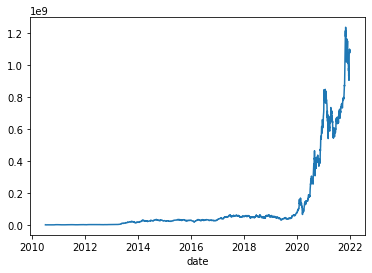

In [30]:
df=df.reset_index().set_index('date')
df.mcap.plot()

**Variable reference for WRDS CRSP data set**
![image.png](../../assets/plots/usingAPI1.jpg)
![image.png](../../assets/plots/usingAPI2.jpg)
![image.png](../../assets/plots/usingAPI3.jpg)